In [1]:
import pandas as pd
import zipfile
import io
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

SPIRAL

In [4]:
spiral_train_dir = r'C:\Users\meenu\OneDrive\Desktop\Parkinsons\pk decease\spiral\training'
spiral_test_dir = r'C:\Users\meenu\OneDrive\Desktop\Parkinsons\pk decease\spiral\testing'

In [6]:
spiral_train_datagen = ImageDataGenerator(rescale=1./255)
spiral_test_datagen = ImageDataGenerator(rescale=1./255)

# Set up batch size and target image dimensions
batch_size = 32
img_height = 128
img_width = 128

In [7]:
# Define training and testing generators
spiral_train_generator = spiral_train_datagen.flow_from_directory(
    spiral_train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'  
)

spiral_test_generator = spiral_test_datagen.flow_from_directory(
    spiral_test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'  
)

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [8]:
# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')  
])

C:\Users\meenu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Train the model
history = model.fit(
    spiral_train_generator,
    steps_per_epoch=len(spiral_train_generator),
    epochs=50,
    validation_data=spiral_test_generator,
    validation_steps=len(spiral_test_generator)
)

Epoch 1/50


C:\Users\meenu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 464ms/step - accuracy: 0.5422 - loss: 2.4939 - val_accuracy: 0.5000 - val_loss: 0.8101
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/50


C:\Users\meenu\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step - accuracy: 0.5156 - loss: 0.7626 - val_accuracy: 0.5000 - val_loss: 0.6954
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 335ms/step - accuracy: 0.5188 - loss: 0.7265 - val_accuracy: 0.5000 - val_loss: 0.7000
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 260ms/step - accuracy: 0.4449 - loss: 0.7166 - val_accuracy: 0.5000 - val_loss: 0.6940
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 284ms/step - accuracy: 0.5373 - loss: 0.6975 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000

In [12]:
print(f'Final Test Accuracy: {model.evaluate(spiral_train_generator)[1]:.4f}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8121 - loss: 0.6921 
Final Test Accuracy: 0.8194


In [15]:
import os

strain_dir = r'C:\Users\meenu\OneDrive\Desktop\Parkinsons\pk decease\spiral\training'
stest_dir = r'C:\Users\meenu\OneDrive\Desktop\Parkinsons\pk decease\spiral\testing'

# Get the class names from the subdirectories in the training directory
class_names = sorted(os.listdir(strain_dir))

print("Class names:", class_names)


Class names: ['healthy', 'parkinson']


In [16]:
model.save("model.h5")

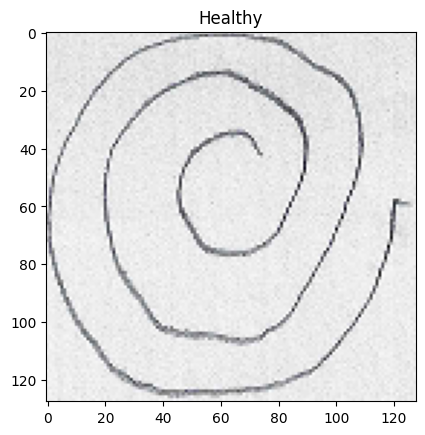

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
healthy


In [18]:
from keras.models import load_model
def load_samples(paths, model):
    for path in paths:
        img_path = path

        img = image.load_img(img_path, target_size=(128, 128))  
        img_tensor = image.img_to_array(img)
        img_tensor = np.expand_dims(img_tensor, axis=0)
        img_tensor /= 255.

        plt.imshow(img_tensor[0])
        plt.title(os.path.basename(os.path.dirname(img_path)).capitalize())  
        plt.show()

        # Predict using the model
        prediction = model.predict(img_tensor)
        #print(prediction) 

    return (class_names[np.argmax(prediction[0])])

model_path = r"C:\Users\meenu\OneDrive\Desktop\Parkinsons\model.h5"
model = load_model(model_path)

image_paths = [r"C:\Users\meenu\OneDrive\Desktop\Parkinsons\pk decease\spiral\training\healthy\V01HE03.png"]
              

print(load_samples(image_paths, model))


WAVE

In [19]:
wave_train_dir = r'C:\Users\meenu\OneDrive\Desktop\Parkinsons\pk decease\wave\training'
wave_test_dir = r'C:\Users\meenu\OneDrive\Desktop\Parkinsons\pk decease\wave\testing'

In [20]:
wave_train_datagen = ImageDataGenerator(rescale=1./255)
wave_test_datagen = ImageDataGenerator(rescale=1./255)

# Set up batch size and target image dimensions
batch_size = 32
img_height = 128
img_width = 128

In [21]:
# Define training and testing generators
wave_train_generator = wave_train_datagen.flow_from_directory(
    wave_train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'  
)

wave_test_generator = wave_test_datagen.flow_from_directory(
    wave_test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'  
)

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [22]:
# Define the classifier
classifier = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')  
])

In [23]:
# Compile the classifier
classifier.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
# Train the classifier
classifier.fit(
    wave_train_generator,
    steps_per_epoch=len(wave_train_generator),
    epochs=50,
    validation_data=wave_test_generator,
    validation_steps=len(wave_test_generator)
)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 602ms/step - accuracy: 0.4822 - loss: 0.9710 - val_accuracy: 0.5000 - val_loss: 0.7081
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 317ms/step - accuracy: 0.4844 - loss: 0.7060 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 303ms/step - accuracy: 0.3602 - loss: 0.6977 - val_accuracy: 0.5000 - val_loss: 0.6927
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 310ms/step - accuracy: 0.5436 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6942
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - lo

In [25]:
print(f'Final Test Accuracy: {classifier.evaluate(wave_train_generator)[1]:.4f}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.8859 - loss: 0.1859
Final Test Accuracy: 0.8889


In [27]:
import os

wtrain_dir = r"C:\Project\Parkinson\wave\training"
wtest_dir = r"C:\Project\Parkinson\wave\testing"

# Get the class names from the subdirectories in the training directory
class_names = sorted(os.listdir(strain_dir))

print("Class names:", class_names)


Class names: ['healthy', 'parkinson']


In [28]:
classifier.save("classifier.h5")

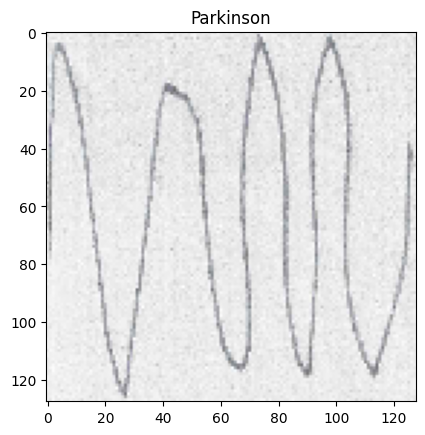

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
parkinson


In [32]:
from keras.models import load_model
def load_samples(paths, classifier):
    for path in paths:
        img_path = path

        img = image.load_img(img_path, target_size=(128, 128))  
        img_tensor = image.img_to_array(img)
        img_tensor = np.expand_dims(img_tensor, axis=0)
        img_tensor /= 255.

        plt.imshow(img_tensor[0])
        plt.title(os.path.basename(os.path.dirname(img_path)).capitalize())  
        plt.show()

        # Predict using the model
        prediction = classifier.predict(img_tensor)
        #print(prediction) 

    return (class_names[np.argmax(prediction[0])])

classifier_path = r"C:\Users\meenu\OneDrive\Desktop\Parkinsons\model.h5"
classifier = load_model(classifier_path)

image_paths = [r"C:\Users\meenu\OneDrive\Desktop\Parkinsons\pk decease\wave\training\parkinson\V01PO02.png"]
              

print(load_samples(image_paths, classifier))

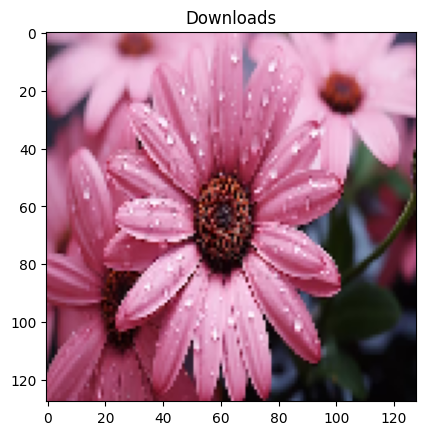

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Prediction: [0.11345167 0.88654834]
Image can be printed.


In [33]:
from keras.models import load_model
def load_samples(paths, model, class_index):
    for path in paths:
        img_path = path

        img = image.load_img(img_path, target_size=(128, 128))  
        img_tensor = image.img_to_array(img)
        img_tensor = np.expand_dims(img_tensor, axis=0)
        img_tensor /= 255.

        plt.imshow(img_tensor[0])
        plt.title(os.path.basename(os.path.dirname(img_path)).capitalize())  
        plt.show()

        # Predict using the model
        prediction = model.predict(img_tensor)
        print("Prediction:", prediction[0])

        predicted_class_index = np.argmax(prediction[0])
        
        if predicted_class_index in class_index:
            print("Image can be printed.")
        else:
            print("Image cannot be printed.")
            
model_path = r"C:\Users\meenu\OneDrive\Desktop\Parkinsons\classifier.h5"
model = load_model(model_path)

image_paths = [r"C:\Users\meenu\Downloads\Flower.png"]
allowed_class_index = [0, 1]  

load_samples(image_paths, model,allowed_class_index)